In [6]:
import pandas as pd

ms = pd.read_csv("Mall_Customers.csv")

# rename the name columns
ms = ms.rename(columns={'Gender' : 'gender', 'Age' : 'age',
                        'Annual Income (k$)' : 'Annual Income',
                        'Spending Score (1-100)' : 'Spending Score'})

# ubah data kategorik menjadi numerik
ms['gender'].replace(['Female', 'Male'], [0, 1], inplace= True)
ms.head()

,CustomerID,gender,age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = ms.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

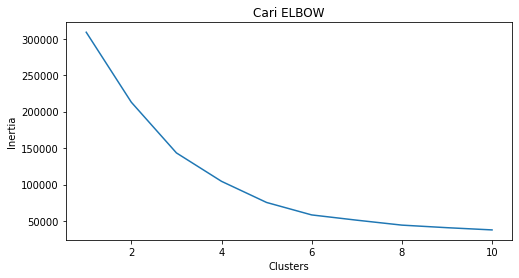

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari ELBOW')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

<function matplotlib.pyplot.show(close=None, block=None)>

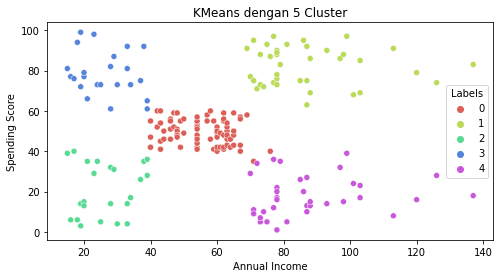

In [23]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Annual Income'], y=X['Spending Score'], hue=X['Labels'],
               palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 Cluster')
plt.show